# Task:

Explore the data set [EDA]

Building a Logistic Regression model

Build a classification_report

In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the datset

df = pd.read_csv("titanic_train.csv")


## Explore the data set [EDA]

In [2]:
#Exploring the data

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Checking info about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#getting basic statistics of the data

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Checking for null values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Due to the fact that no questions are based on the "Cabin" and "Embarked" columns, missing values will not be fixed.

Age values that are currently missing will be filled in since they are relevant to the questions and analysis below.

In [6]:
#Replacing the NAN in the Age column with the mean value.

df.fillna(df.mean(numeric_only = True).round(1), inplace=True)

In [7]:
df['Age'].mean()

29.69929292929302

In [8]:
df['Age'].max()

80.0

In [9]:
df['Age'].min()

0.42

In [10]:
#Checking for duplicates

df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


No duplicated values are spotted in the data

In [11]:
df.shape

(891, 12)

In [12]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [13]:
#Checking the correlation of the columns in the dataframe

df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033206,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069811,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331334,0.083081,0.018443,-0.549500
Age,0.033206,-0.069811,-0.331334,1.000000,-0.232624,-0.179194,0.091563
SibSp,-0.057527,-0.035322,0.083081,-0.232624,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179194,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091563,0.159651,0.216225,1.000000


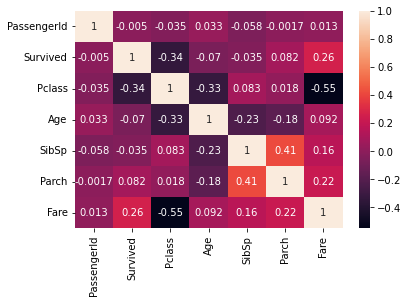

In [14]:
#Visualizing the correlations

sns.heatmap(df.corr(), annot = True)
plt.show()

To visualize the relationship between the parameters of the dataset, we make use of heatmap. The parameters whose ratio  were closer to one seems to have a closer relationship as compared to those whose ratio was closer to 0. For instance, the parch and survived parameters can be said to be closely related because the ratio tends towards 1. The closer the figure is to 1, the higher the probability of being closely related and the farther it is from 1, the lower the probability of being closely related. 

In [15]:
# import plotly.express as px
# fig = px.scatter_3d(df, x='PassengerId', y='Sex', z='Age',
#                     color='Age')
# fig.show()

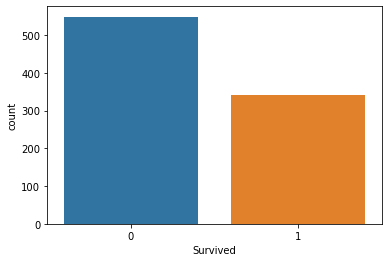

In [16]:
sns.countplot(x = "Survived", data = df)
plt.show()

The number of people who died is more than those that survived.

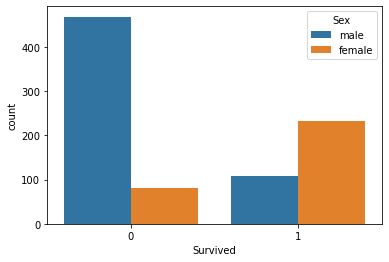

In [17]:
sns.countplot(x = "Survived", hue = "Sex", data = df)
plt.show()

The survival rate was relatively high for females. We can infer that rescue efforts were prioritized for females.

In [4]:
#sns.countplot(x = "Survived", hue = "Parch", data = df)
#plt.show()

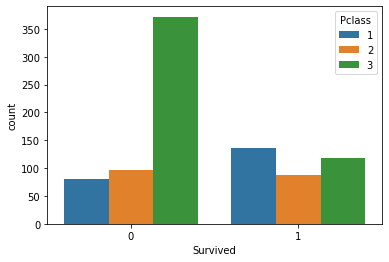

In [19]:
#Survivors by class

sns.countplot(x = "Survived", hue = "Pclass", data = df)
plt.show()

The highest rate of survival was among first-class passengers, followed by second-class travelers, while the lowest survival rates were among third-class passengers.

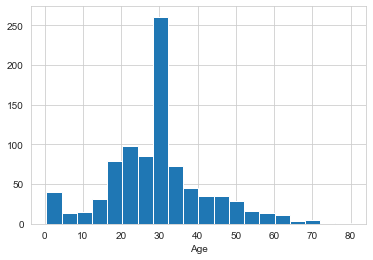

In [20]:
sns.set_style("whitegrid")
df["Age"].hist(bins=20)
plt.xlabel("Age")
plt.show()


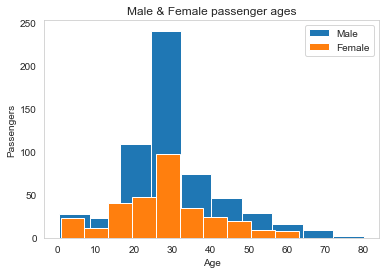

In [21]:
age_male = (df[df.Sex == 'male'])['Age']
age_female = (df[df.Sex == 'female'])['Age']

age_male.hist(label='Male')
age_female.hist(label='Female')

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.title('Male & Female passenger ages')
plt.legend(loc='best')
plt.grid(False)

There were fewer females than males in each age group.

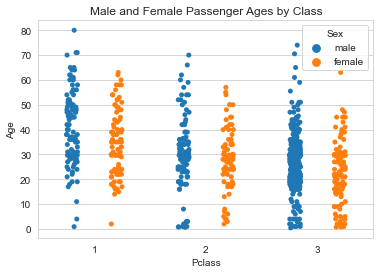

In [22]:
sns.stripplot(x='Pclass', y='Age', data=df, hue='Sex', dodge=True).set_title('Male and Female Passenger Ages by Class')
plt.show()

In each class, as can be seen above, there were more male passengers. That makes sense given that there are more male passengers here. In addition, the first class had more older people than the third class did. We can assume that older people are employed and make more money than younger people, who are likely still in school or living with their parents.

## Building a Logistic Regression model

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Both the dependent and independent variables have variables assigned to them.

X = df[["PassengerId", "Pclass", "Age", "SibSp", "Parch", "Fare"]]
y = df["Survived"]

In [25]:
# spliting data into training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 21)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
# Performing grid search of Logistic Regresssion model

logmodel = LogisticRegression()

# fitting the data

logmodel.fit(X_train, y_train)

LogisticRegression()

#### Prediction and evaluation

In [28]:
#Calling the test data

X_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare
105,106,3,28.0,0,0,7.8958
244,245,3,30.0,0,0,7.2250
80,81,3,22.0,0,0,9.0000
712,713,1,48.0,1,0,52.0000
780,781,3,13.0,0,0,7.2292
...,...,...,...,...,...,...
651,652,2,18.0,0,1,23.0000
660,661,1,50.0,2,0,133.6500
701,702,1,35.0,0,0,26.2875
32,33,3,29.7,0,0,7.7500


In [29]:
# prediction on the test data

pred = logmodel.predict(X_test)
pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0], dtype=int64)

In [30]:
pred.shape

(268,)

From our array, We were able to predict the chances of survival for each of the 268 passengers.

## Build a classification_report

In [31]:
from sklearn.metrics import classification_report

In [32]:
report = classification_report
report

<function sklearn.metrics._classification.classification_report(y_true, y_pred, *, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')>

In [33]:
#create a Classification  report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       166
           1       0.71      0.40      0.51       102

    accuracy                           0.71       268
   macro avg       0.71      0.65      0.65       268
weighted avg       0.71      0.71      0.69       268



#### predictiction for survival

Precision: Out of all the passengers that the model predicted would survive, 67% did.

Recall: Out of all the passengers who survived, the model only predicted this outcome correctly for 49% of those passengers.

F1 Score: Since this value is closer to 1, it tells us that the model does a good job of predicting whether or not the passengers will survive.

Support: We can see that among the passengers in the test dataset, 168 did not survive and 100 did.


#### predictiction for deceased.

Precision: Out of all the passengers that the model predicted would die, 74% did.

Recall: Out of all the passengers who died, the model predicted this outcome correctly for 86% of those passengers.

F1 Score: Since this value is close to 1, it tells us that the model does a good job of predicting whether or not the passengers will die.
